# **Practice 8**

## Differences between convergence and absolute stability

1. The **explicit midpoint method**   

$$u_{n+1}=u_{n-1}+2hf\left(t_n,u_n\right)$$

is one of the typical methods studied in a *Numerical Methods* class.

Here we are going to use it to solve the test problem

$$\begin{array}{l}
y'=\lambda y \\
y(0) = 1
\end{array}$$

- Code the midpoint method. You need to initial values, calculate $y(-h)=y(0)-hf(0,y(0))$.
- Solve the test problem for $\lambda = -1$ over the interval $[0,1]$ for stepsizes $h=0.5,0.25,0.1$
and plot the solutions along with the analytic solution. 
- Now solve the same problem on the interval $[0,100]$ with $h=0.1$ and plot the solution along with the analytic one. 
- Do the same with the explicit Euler's method.
- Explain the results.


2. The Lorentz equations

$$\begin{array}{l}
\frac{dx}{dt}=\sigma(y-x) \\
\frac{dy}{dt}=x(\rho-z)-y \\
\frac{dz}{dt}=xy-\beta z
\end{array}
$$

Write a code to solve this system of ODEs for $\sigma=10$, $\rho=28$, $\beta=8/3$, $t_0=0$, $t_f=50$ and $(x[0],y[0],z[0])=(0, 1, 1.05)$ and plot the solution using your own code or if you need it (or don't have time to think):

from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10,10))

ax = plt.axes(projection='3d')

ax.grid()

ax.plot3D(x, y, z)

ax.set_xlabel('x', labelpad=20)

ax.set_ylabel('y', labelpad=20)

ax.set_zlabel('z', labelpad=20)

plt.show()

# Solution


### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Implementation of methods

In [2]:
def euler_explicit_midpoint(f: 'Callable[float, float]', y0: float, t0: float, t: float, h: float) -> np.ndarray:
    r"""Computes the explicit (forward) midpoint Euler method to solve ODEs.

    The **explicit midpoint method** is :math: `u_{n+1}=u_{n-1}+2hf\left(t_n,u_n\right)`

    As two initial values are required, if y0_previous is not provided, it is computed with :math: `$y(-h)=y(0)-hf(0,y(0))$`.

    Args:
        f (Callable[float, float]): Function depending on y and t in that order.
            Equivalent to f(y,t).
        y0 (float): Initial value of the answer.
            Equivalent to y(t0).
        t0 (float): Initial time.
        t (float): Final time.
        h (float): Separation between the points of the interval.

    Returns:
        np.ndarray: Numerical solution of the ODE in the interval [t0, t0+h, ..., t-h, t].
    """
    t_ = np.arange(t0, t+h, h)
    N = len(t_)

    u = np.zeros_like(t_)
    u_previous = y0 - h * f(y0, t_[0])
    u[0] = y0

    for i in range(N-1):
        if i == 0:
            u[i+1] = u_previous + 2 * h * f(u[i], t_[i])
        else:
            u[i+1] = u[i-1] + 2 * h * f(u[i], t_[i])

    return u, t_

def euler_explicit(f: 'Callable[float, float]', y0: float, t0: float, t: float, h: float) -> np.ndarray:
    r"""Computes the explicit (forward) Euler method to solve ODEs.

    Args:
        f (Callable[float, float]): Function depending on y and t in that order.
            Equivalent to f(y,t).
        y0 (float): Initial value of the answer.
            Equivalent to y(t0).
        t0 (float): Initial time.
        t (float): Final time.
        h (float): Separation between the points of the interval.

    Returns:
        np.ndarray: Numerical solution of the ODE in the interval [t0, t0+h, ..., t-h, t].
    """
    t_ = np.arange(t0, t+h, h)
    N = len(t_)

    u = np.zeros_like(t_)
    u[0] = y0

    for i in range(N-1):
        u[i+1] = u[i] + h * f(u[i], t_[i])

    return u, t_

def euler_explicit_systems(f: 'Callable[float, ...]', vec0: np.ndarray, t0: float, t: float, h: float) -> np.ndarray:
    r"""Computes the explicit (forward) Euler method to solve a system of ODEs.

    The order of the arguments (variables) in `f` must the the same of the values in `vec0`.

    Args:
        f (Callable[float, ...]): Function depending on the any number of variables.
            Currently it does not support explicit dependence on time.
            Equivalent to f(y,t).
        vec0 (np.ndarray): Initial values of the answer.
            Equivalent to [x(t0), y(t0), ...].
        t0 (float): Initial time.
        t (float): Final time.
        h (float): Separation between the points of the interval.

    Returns:
        np.ndarray: Numerical solution of the ODE in the interval [t0, t0+h, ..., t-h, t].
    """
    t_ = np.arange(t0, t+h, h)
    N = len(t_)

    u = np.zeros((vec0.shape[0], N))

    u[:, t0] = vec0

    for i in range(N-1):
        u[..., i+1] = u[..., i] + h * f(*u[..., i])

    return u, t_

### Solving IVPs

In [3]:
def exercise1(section, method):

    if section==1:
            
        h = [0.5, 0.25, 0.1]
        t0, t = 0, 1
    
    elif section==2:
        h = [0.1]
        t0, t = 0, 100  
    
    y0 =1
    f = lambda y, t: -y

    for hi in h:
        sol = method(f, y0, t0, t, hi)
        plt.plot(sol[1], sol[0], label=f'{hi}')
    
    t= np.arange(t0, t+ 0.001, 0.001)

    plt.plot(t, np.exp(-t), label='analytical')

    plt.legend()
    plt.show()


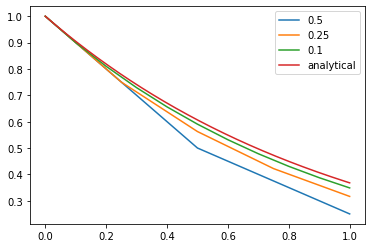

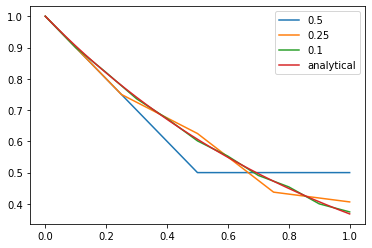

In [4]:
exercise1(1, euler_explicit)
exercise1(1, euler_explicit_midpoint)

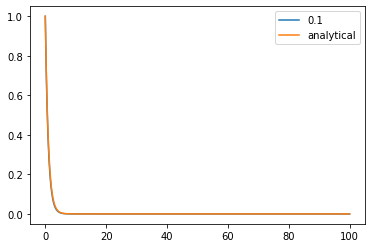

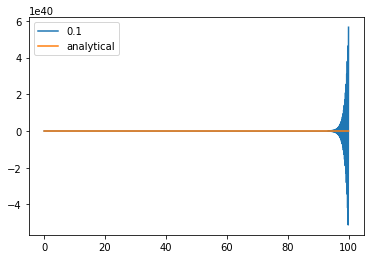

In [5]:
exercise1(2, euler_explicit)
exercise1(2, euler_explicit_midpoint)

## Exercise 2

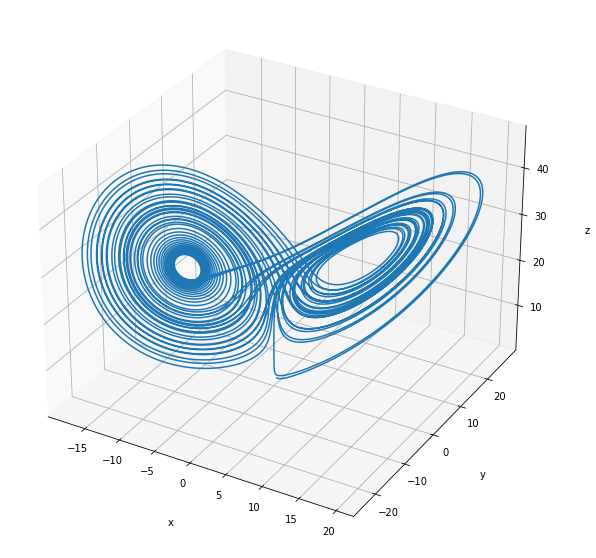

In [6]:
t0, tf = 0, 50
vec0 = np.array([0, 1, 1.05])

s, r, b = 10, 28, 8/3

f = lambda x, y, z: np.array([s*(y-x), x*(r-z)-y, x*y - b*z])

h = 1e-4

u, _ = euler_explicit_systems(f, vec0, t0, tf, h)

fig = plt.figure(figsize = (10,10))

ax = plt.axes(projection='3d')

ax.grid()

ax.plot3D(u[0,:], u[1, :], u[2, :])

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()